In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv('houseRegressionStudents.csv')


In [2]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [3]:
df.drop(['Unnamed: 0','Id'],axis = 1,inplace = True )
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
dfn = df._get_numeric_data()
dfn

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


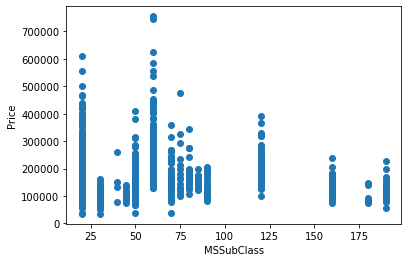

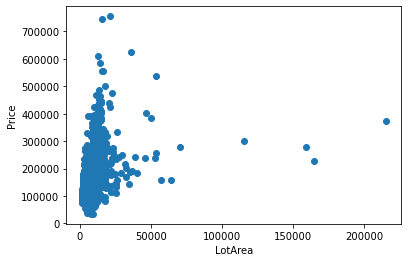

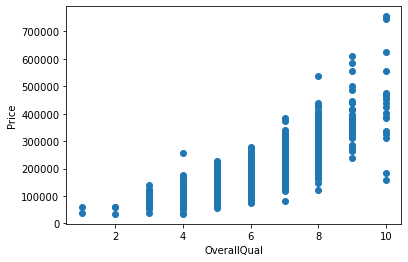

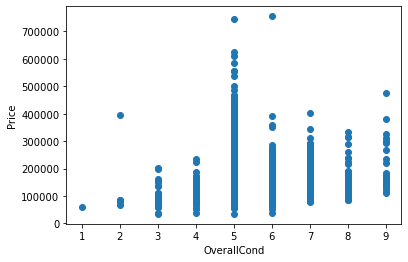

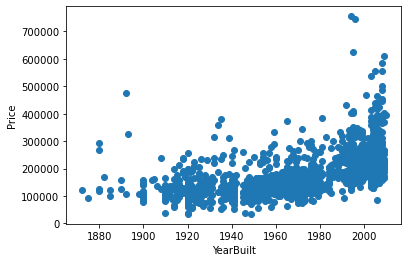

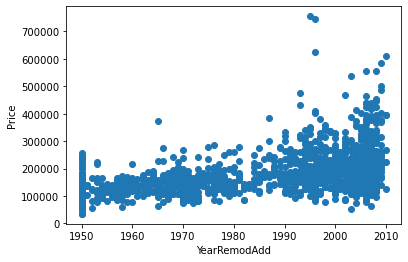

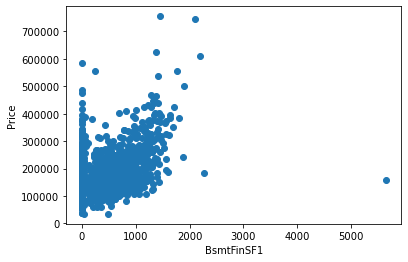

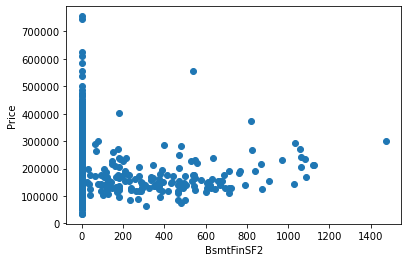

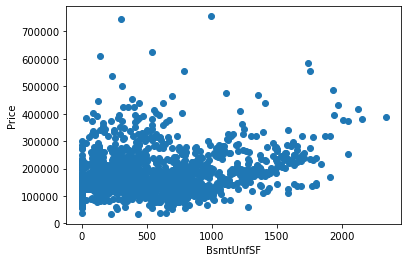

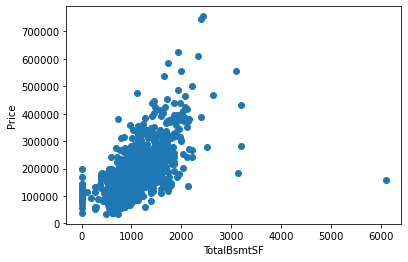

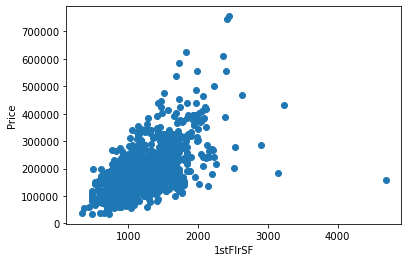

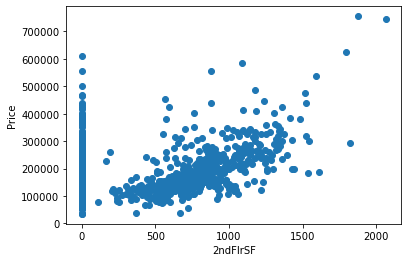

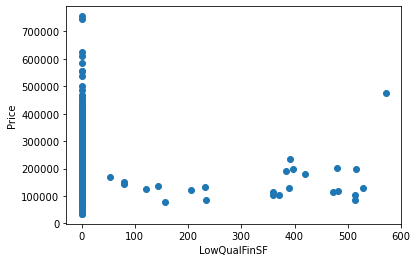

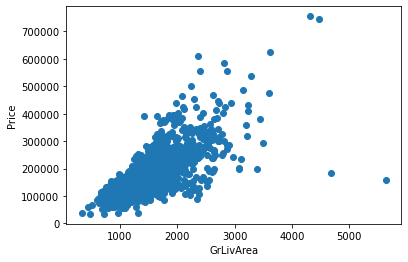

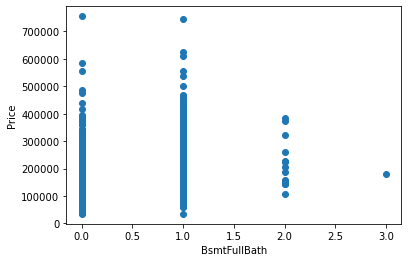

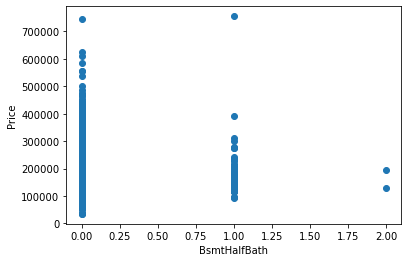

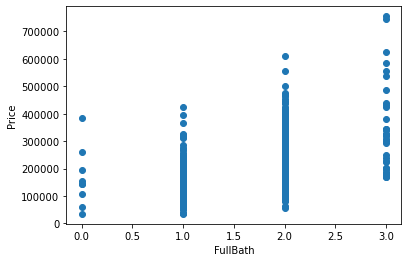

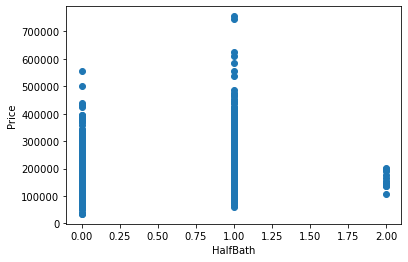

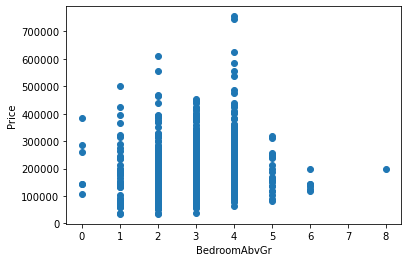

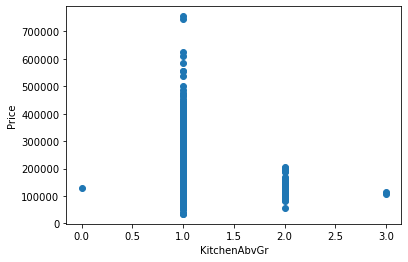

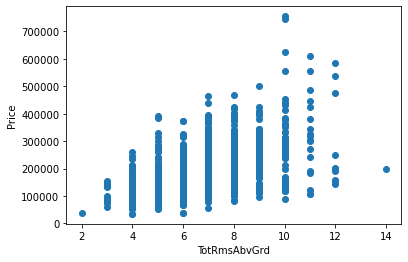

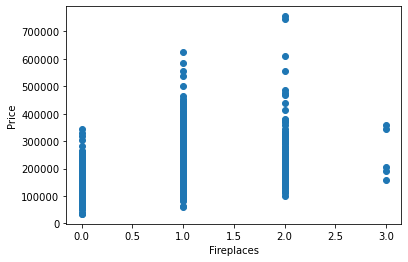

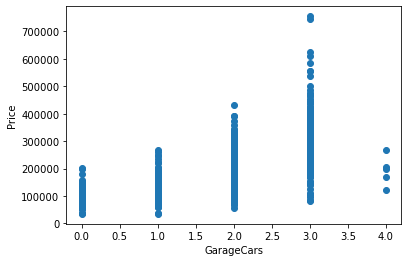

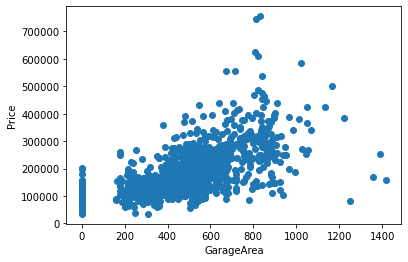

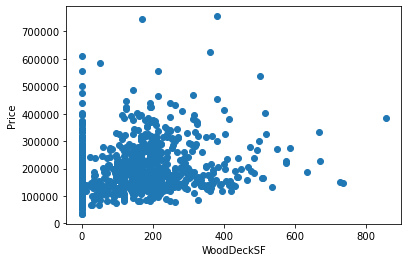

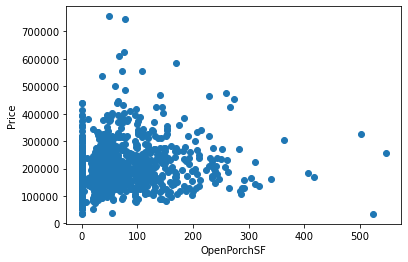

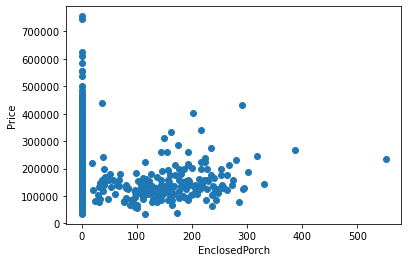

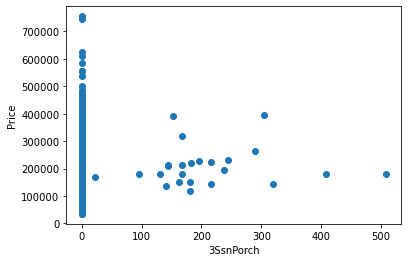

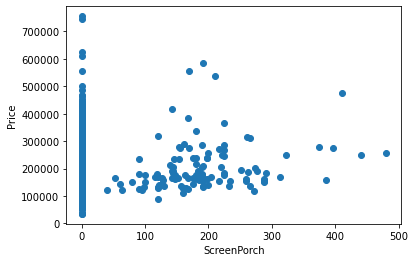

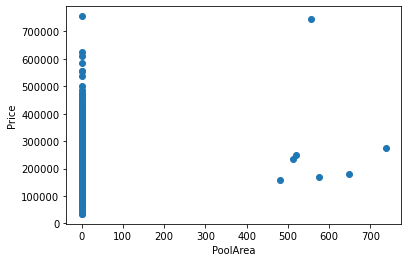

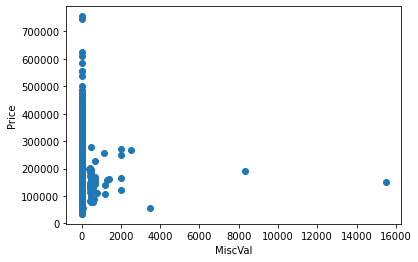

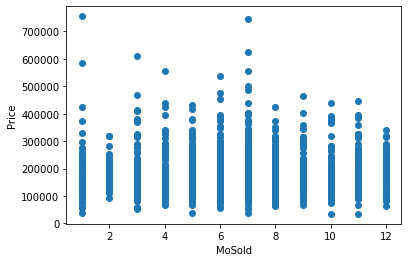

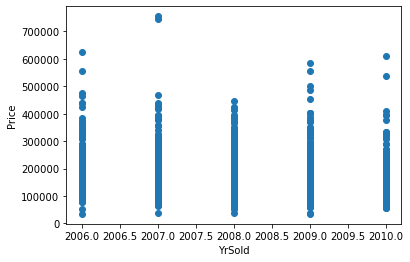

Independent variables that show non-linear behavior: ['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [5]:
y = dfn['SalePrice']
X = dfn.drop(['SalePrice'], axis=1)

non_linear = []
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()
    
    corr = X[col].corr(y)
    if abs(corr) < 0.5:
        non_linear.append(col)
        
print("Independent variables that show non-linear behavior:", non_linear)

# Q2 : Columns which showed non linear behavior apply Polynomial Linear Regression to it ..

In [6]:
x = df[non_linear]
y = df.iloc[:, -1]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

print("R-squared score:", model.score(x_poly, y)*100)

R-squared score: 86.36974752971291


# Q3 : Apply multi Linear regression to the Housing Price Data Set 
	Note : you can take any number of Independent Variable 
	Note :  You need to make 3 models atleast with different number of indepent variable 
	Note : Try to get the best posible accuracy


In [8]:
dfn

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
#1st Model
x = dfn.iloc[:,:-1]
y = dfn.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

85.41028659609144

In [11]:
#2nd Model
x = dfn.iloc[:,:16]
y = dfn.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
r2_score(y_test,y_pred)*100

83.96882956359768

In [12]:
#3rd Model
x = dfn.iloc[:,16:-1]
y = dfn.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
r2_score(y_test,y_pred)*100

72.05887961066482

# Q4 : We are providing you churn dataset and we expect you to apply logistic regression on it and try to change the hyperparameters so that you can get the best possible acuracy


In [13]:
churn = pd.read_csv('ChurnData.csv')
churn.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [14]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg

LogisticRegression()

In [15]:
y = churn.iloc[ : , -1] 
x = churn.iloc[:,:-1] 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
lg.fit(x_train,y_train)
yhat = lg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)*100

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


77.5

In [16]:
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


accuracy_score(y_test, y_pred)*100

77.5

In [20]:
model = LogisticRegression(C=0.2, penalty='l2', solver='newton-cg')
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


accuracy_score(y_test, y_pred)*100

70.0

# Q5 : We are providing you the cell dataset and we expect you to use all the independent variables for creating the SVM machine learning model and change the hyperparameters so that you can get the best accuracy


In [21]:
df = pd.read_csv('cell_samples.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [22]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc']= df.astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [23]:
y = df.iloc[ : , -1].values 
x = df.iloc[:,:-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
yhat = svc.predict(x_test)

accuracy_score(y_test, yhat)*100

65.69343065693431

In [25]:
model = SVC(C=0.1, gamma=0.1, kernel='rbf')
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)*100

65.69343065693431

In [26]:
model = SVC(C=0.1, gamma=0.1, kernel='linear')
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)*100

67.88321167883211

# Q6 :  Take the same cell Dataset and instead of SVM apply logistic regression in it..

In [27]:
from sklearn.linear_model import LogisticRegression
y = df.iloc[ : , -1].values 
x = df.iloc[:,:-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

lg = LogisticRegression()
lg.fit(x_train,y_train)
yhat = lg.predict(x_test)
accuracy_score(y_test,yhat)*100

65.69343065693431

# Q7 : we are providing you a dataset apart from churn and cell dataset which is titanic dataset remove unnecessary column which are not usefull  with aspect of machine learning and apply label encoding where ever its necessary and store processed data into your memory

In [28]:
tt =  pd.read_csv('train_ titanic dataset .csv')
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Survived     712 non-null    int64  
 3   Pclass       712 non-null    int64  
 4   Name         712 non-null    object 
 5   Sex          712 non-null    object 
 6   Age          712 non-null    float64
 7   SibSp        712 non-null    int64  
 8   Parch        712 non-null    int64  
 9   Ticket       712 non-null    object 
 10  Fare         712 non-null    float64
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 66.9+ KB


In [29]:
tt

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
set(tt['Embarked'])

{'C', 'Q', 'S'}

In [31]:
new_df = tt[['PassengerId','Pclass','Age','Sex','SibSp','Parch','Fare','Embarked']].values
new_df

array([[1, 3, 22.0, ..., 0, 7.25, 'S'],
       [2, 1, 38.0, ..., 0, 71.2833, 'C'],
       [3, 3, 26.0, ..., 0, 7.925, 'S'],
       ...,
       [888, 1, 19.0, ..., 0, 30.0, 'S'],
       [890, 1, 26.0, ..., 0, 30.0, 'C'],
       [891, 3, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [32]:
from sklearn import preprocessing
ls = preprocessing.LabelEncoder()
lb = preprocessing.LabelEncoder()

In [33]:

ls.fit(['female','male']) 
new_df[:,3]=ls.transform(new_df[:,3])

lb.fit(['C', 'Q', 'S']) 
new_df[:,7]=lb.transform(new_df[:,7])

In [34]:
new_df

array([[1, 3, 22.0, ..., 0, 7.25, 2],
       [2, 1, 38.0, ..., 0, 71.2833, 0],
       [3, 3, 26.0, ..., 0, 7.925, 2],
       ...,
       [888, 1, 19.0, ..., 0, 30.0, 2],
       [890, 1, 26.0, ..., 0, 30.0, 0],
       [891, 3, 32.0, ..., 0, 7.75, 1]], dtype=object)

In [35]:
y = tt['Survived']

# Q8 : Use that processed titanic dataset and apply svm in it 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(new_df,y,test_size=0.2,random_state=100)
svc = SVC(C=0.1, gamma=0.1, kernel='linear')
svc.fit(x_train, y_train)
yhat = svc.predict(x_test)

accuracy_score(y_test, yhat)*100

80.41958041958041